<a href="https://colab.research.google.com/github/venkat932023/IPL_Capstone_Project/blob/main/IPL_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IPL_Dataset/IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


**BASIC INFORMATION**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and clos of the dataset

In [9]:
df.shape

(74, 20)

In [10]:
print(f"The rows are {df.shape[0]} and cols are {df.shape[1]}")

The rows are 74 and cols are 20


Now lets see how many cols have null values

In [12]:
df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


**Now lets see some basic questions in dataset**

1. Which team won most matches.

In [16]:
won = df['match_winner'].value_counts()
won

,count
match_winner,
Gujarat,12
Rajasthan,10
Banglore,9
Lucknow,9
Punjab,7
Delhi,7
Kolkata,6
Hyderabad,6
Chennai,4


Text(0.5, 1.0, 'Matches won by teams')

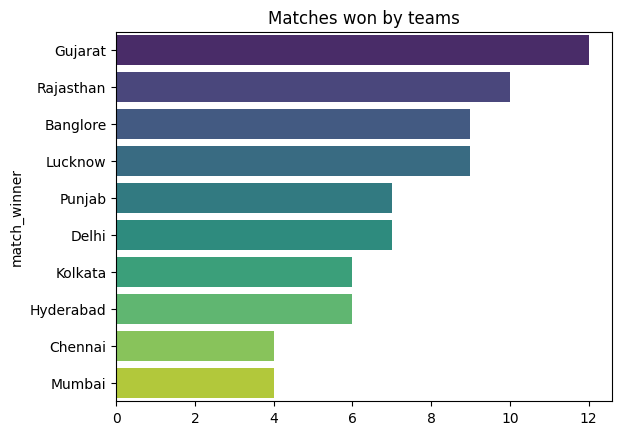

In [19]:
sns.barplot(x=won.values, y=won.index, palette='viridis')
plt.title("Matches won by teams")

2. Toss decision trends

<Axes: xlabel='count', ylabel='toss_decision'>

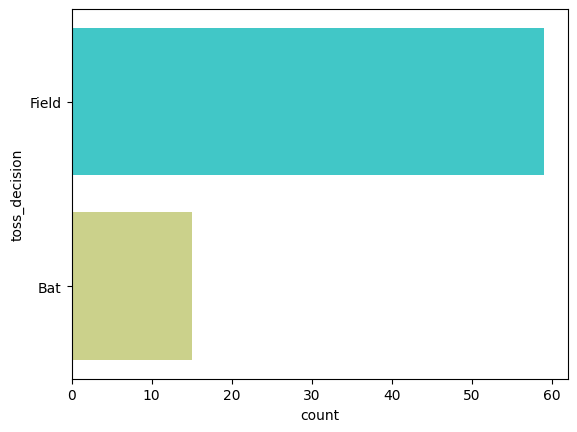

In [20]:
sns.countplot(df['toss_decision'], palette='rainbow')

<Axes: ylabel='toss_decision'>

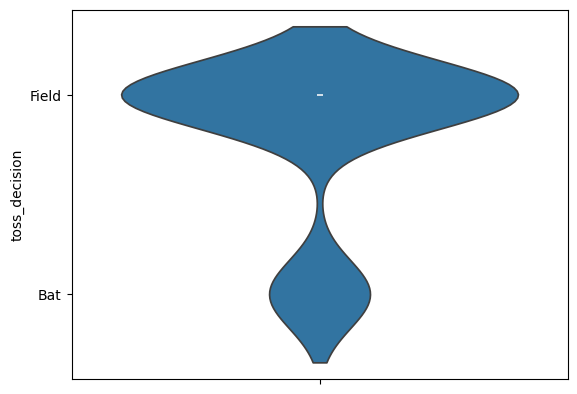

In [22]:
sns.violinplot(y='toss_decision',data=df)

3. Toss winners vs Match winners

<Axes: ylabel='toss_winner'>

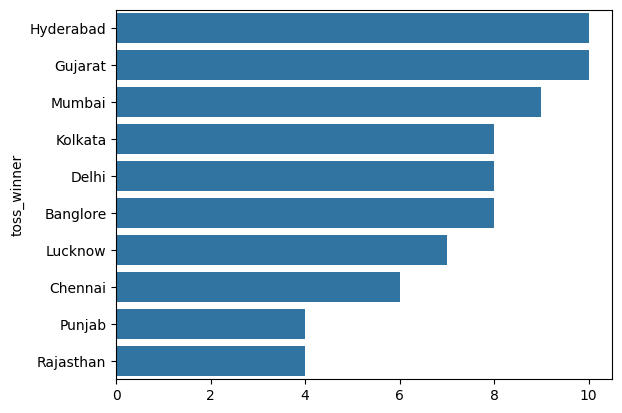

In [39]:
sns.barplot(x=df['toss_winner'].value_counts().values, y=df['toss_winner'].value_counts().index)

<Axes: ylabel='match_winner'>

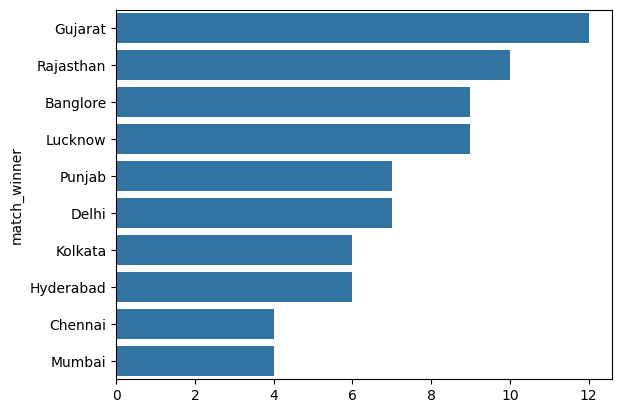

In [40]:
sns.barplot(x=df['match_winner'].value_counts().values, y=df['match_winner'].value_counts().index)

4. How do teams win (wickets or runs)

<Axes: xlabel='won_by', ylabel='count'>

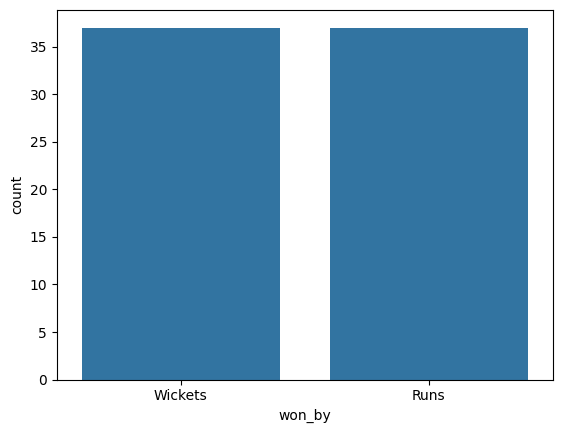

In [41]:
sns.countplot(x=df['won_by'])

**Key Players Performance**

1. Most "Player of matches" awards

In [47]:
pom = df['player_of_the_match'].value_counts().head(10)
pom

,count
player_of_the_match,
Kuldeep Yadav,4
Jos Buttler,3
Wanindu Hasaranga,2
Umesh Yadav,2
Quinton de Kock,2
Shubman Gill,2
Avesh Khan,2
Dinesh Karthik,2
Hardik Pandya,2


<Axes: ylabel='player_of_the_match'>

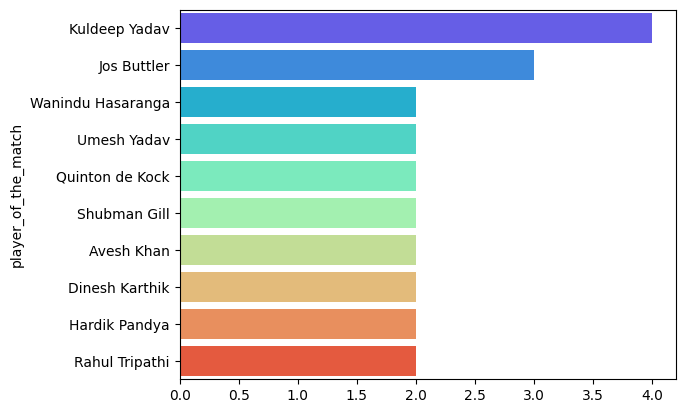

In [53]:
sns.barplot(y=pom.index, x=pom.values, palette='rainbow')

2. 10 top scores

In [60]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(10)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377
KL Rahul,351
Shubman Gill,288
Faf du Plessis,257
Liam Livingstone,239
David Warner,213
W. Saha,190
Ishan Kishan,180


<Axes: ylabel='top_scorer'>

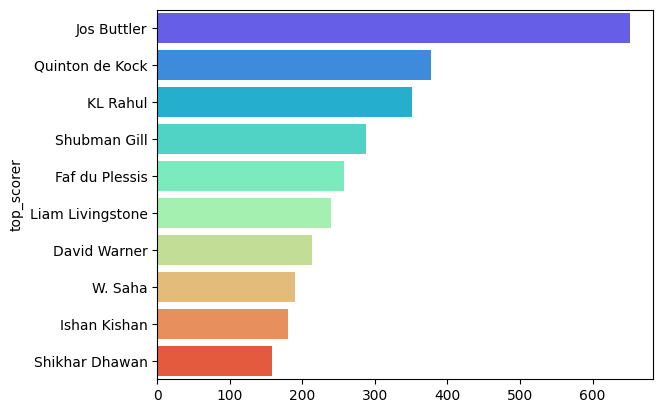

In [61]:
sns.barplot(x=high.values, y=high.index, palette='rainbow')

<Axes: ylabel='top_scorer'>

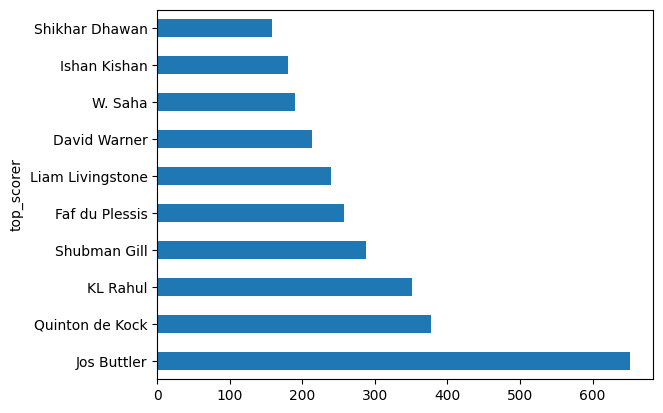

In [62]:
high.plot(kind='barh')

3. Top 10 best bowlers

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: high_wickets, dtype: int64


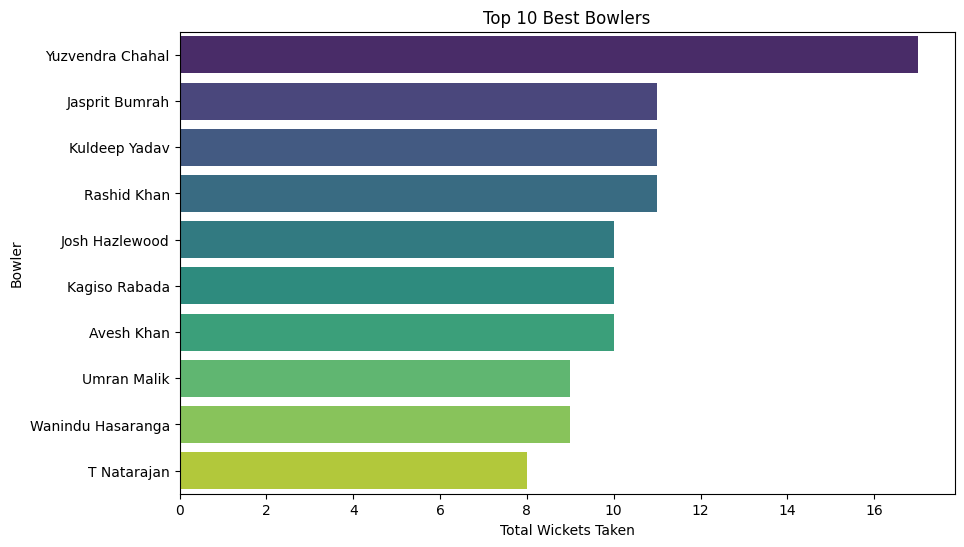

In [75]:

# Extract wickets from 'best_bowling_figure'
df['high_wickets'] = df['best_bowling_figure'].apply(lambda x: int(x.split('--')[0]))

# Group by 'best_bowling' and sum the 'high_wickets' to get total wickets for each bowler
top_bowling_figures = df.groupby('best_bowling')['high_wickets'].sum().sort_values(ascending=False).head(10)

print(top_bowling_figures)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowling_figures.values, y=top_bowling_figures.index, palette='viridis')
plt.title('Top 10 Best Bowlers')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()

**Venue Analysis**

1. Most matches played by venue

In [81]:
v = df['venue'].value_counts()
v

,count
venue,
"Wankhede Stadium, Mumbai",21
"Dr DY Patil Sports Academy, Mumbai",20
"Brabourne Stadium, Mumbai",16
"Maharashtra Cricket Association Stadium,Pune",13
"Eden Gardens, Kolkata",2
"Narendra Modi Stadium, Ahmedabad",2


<Axes: ylabel='venue'>

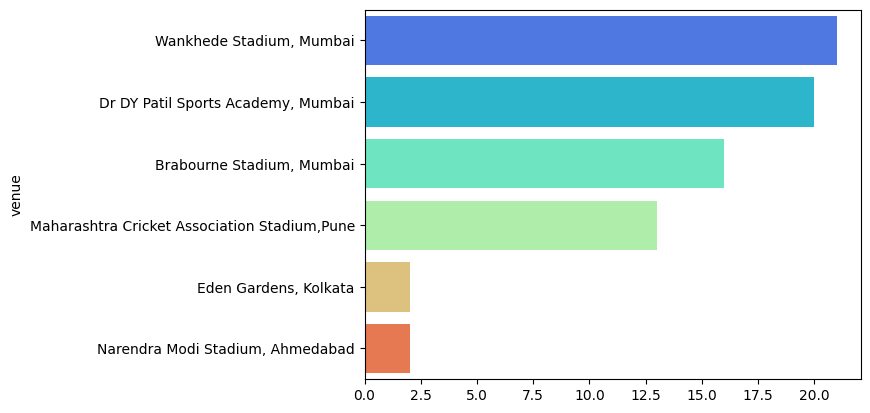

In [82]:
sns.barplot(x=v.values, y=v.index, palette='rainbow')

**Custom questions and insights**

1. Who won the highest margin by runs

In [84]:
df[df['won_by']== 'Runs'].sort_values(by='margin', ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


2. Which player had most individual score

In [88]:
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


3. Which bowler had the best bowling figures

In [91]:
df[df['high_wickets']==df['high_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
